In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
dados = pd.read_csv("data/Alchool/student-mat.csv")

In [3]:
dados = dados.rename(columns={"age": "idade", "Medu": "EduMae", "Fedu":"EduPai", "traveltime":"tempoAteEscola",
                             "studytime":"horaEstudoSemanal", "failures":"reprovacoes", "famrel":"nivelRelacaoFamiliar",
                             "freetime":"tempoLivre", "goout":"saiComAmigos", "Dalc":"consumoDiaSemana", 
                              "Walc":"consumoFimDeSemana", "health":"saudeAtual", "absences":"faltas", 
                              "G1":"notaPrimeroPeriodo", "G2":"notaSegundoPeriodo", "G3":"notaTerceiroPeriodo",
                             "school":"escola", "sex":"sexo", "Mjob":"trabalhoMae", "Fjob": "trabalhoPai",
                             "address":"ondeMora", "famsize":"tamanhoFamilia", "Pstatus":"paisVivendoJuntos",
                             "Mstatus":"statusMae", "reason":"porqueEscolheuEscola", "guardian":"guarda",
                             "schoolsup":"ajudaExtraEdu", "famsup":"ajudaExtraFamilia", "paid":"aulasExtraPaga",
                             "activities":"extracurricular", "nursery":"foiAoMaternal", "higher":"querFaculdade",
                             "internet":"internetEmCasa", "romantic":"emRelacionamento"})
# dados.describe()

In [4]:
dados.head()

,escola,sexo,idade,ondeMora,tamanhoFamilia,paisVivendoJuntos,EduMae,EduPai,trabalhoMae,trabalhoPai,porqueEscolheuEscola,guarda,tempoAteEscola,horaEstudoSemanal,reprovacoes,ajudaExtraEdu,ajudaExtraFamilia,aulasExtraPaga,extracurricular,foiAoMaternal,querFaculdade,internetEmCasa,emRelacionamento,nivelRelacaoFamiliar,tempoLivre,saiComAmigos,consumoDiaSemana,consumoFimDeSemana,saudeAtual,faltas,notaPrimeroPeriodo,notaSegundoPeriodo,notaTerceiroPeriodo
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [44]:
a = dados[["EduMae", "EduPai", "tempoAteEscola", "horaEstudoSemanal", "reprovacoes", "nivelRelacaoFamiliar", \
       "tempoLivre", "saiComAmigos", "consumoDiaSemana", "consumoFimDeSemana", "saudeAtual", "faltas", "notaPrimeroPeriodo",\
       "notaSegundoPeriodo","notaTerceiroPeriodo"]]

# ax = sns.heatmap(a)
# pd.get_dummies(dados,columns=["guarda"]).head()

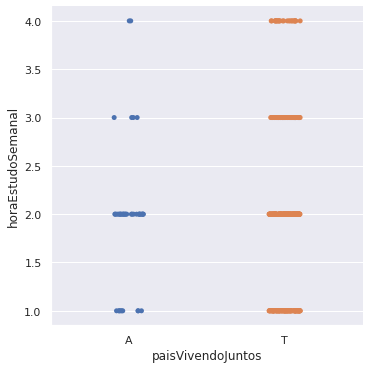

In [12]:

sns.catplot(x="paisVivendoJuntos", y="horaEstudoSemanal", data=dados)

In [31]:
df_gp = dados[dados["escola"] == "GP"].sample()

In [34]:
df_ms = dados[dados["escola"] == "MS"]

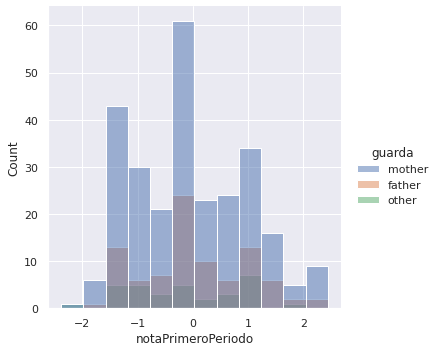

In [52]:
sns.displot(dados, x="notaPrimeroPeriodo", hue="guarda")

In [47]:
scaler = StandardScaler()
scaler.fit(a.values)
new_values =scaler.transform(a.values)


In [49]:
new_values.shape

(395, 15)

In [50]:
dados[["EduMae", "EduPai", "tempoAteEscola", "horaEstudoSemanal", "reprovacoes", "nivelRelacaoFamiliar", \
       "tempoLivre", "saiComAmigos", "consumoDiaSemana", "consumoFimDeSemana", "saudeAtual", "faltas", "notaPrimeroPeriodo",\
       "notaSegundoPeriodo","notaTerceiroPeriodo"]] = new_values

In [51]:
dados.head()

,escola,sexo,idade,ondeMora,tamanhoFamilia,paisVivendoJuntos,EduMae,EduPai,trabalhoMae,trabalhoPai,porqueEscolheuEscola,guarda,tempoAteEscola,horaEstudoSemanal,reprovacoes,ajudaExtraEdu,ajudaExtraFamilia,aulasExtraPaga,extracurricular,foiAoMaternal,querFaculdade,internetEmCasa,emRelacionamento,nivelRelacaoFamiliar,tempoLivre,saiComAmigos,consumoDiaSemana,consumoFimDeSemana,saudeAtual,faltas,notaPrimeroPeriodo,notaSegundoPeriodo,notaTerceiroPeriodo
0,GP,F,18,U,GT3,A,1.143856,1.360371,at_home,teacher,course,mother,0.792251,-0.042286,-0.449944,yes,no,no,no,yes,yes,no,no,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934
1,GP,F,17,U,GT3,T,-1.600009,-1.399970,at_home,other,course,father,-0.643249,-0.042286,-0.449944,no,yes,no,no,no,yes,yes,no,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934
2,GP,F,15,U,LE3,T,-1.600009,-1.399970,at_home,other,other,mother,-0.643249,-0.042286,3.589323,yes,no,yes,no,yes,yes,yes,no,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739
3,GP,F,15,U,GT3,T,1.143856,-0.479857,health,services,home,mother,-0.643249,1.150779,-0.449944,no,yes,yes,yes,yes,yes,yes,yes,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
4,GP,F,16,U,GT3,T,0.229234,0.440257,other,other,home,father,-0.643249,-0.042286,-0.449944,no,yes,yes,no,yes,yes,no,no,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739


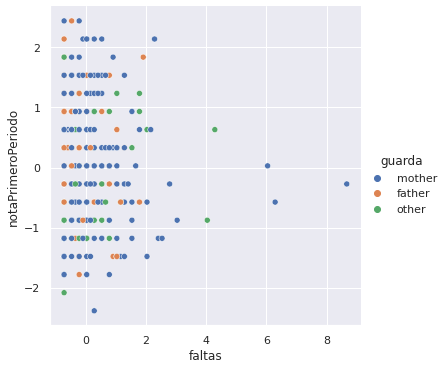

In [61]:
sns.relplot(x="faltas", y="notaPrimeroPeriodo", hue="guarda", data=dados);